In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
import seaborn as sns
import warnings
from scipy.stats import entropy
from sklearn.cluster import DBSCAN

warnings.filterwarnings("ignore")
import os
import glob


def getDF(df_raw, featurename):
    #columnname = [featurename]
    #df_extract = df_raw.loc[:, columnname].copy()
    df_extract = df_raw.copy()

    #if 'Time' in df_raw.columns:
    #    df_extract.index = pd.to_datetime(df_raw["Time"],
    #                                      format='%Y-%m-%d %H:%M:%S')
    if 'date' in df_raw.columns:
        df_extract.index = pd.to_datetime(df_raw["date"], format='%Y-%m-%d')


    # Transfer datetime
    #     from datetime import datetime

    df_extract['DoW'] = [''] * len(df_extract)
    df_extract['Month'] = [''] * len(df_extract)
    df_extract['Date'] = [''] * len(df_extract)
    df_extract['Hour'] = [''] * len(df_extract)
    df_extract['Week'] = [''] * len(df_extract)
    df_extract['Minute'] = [''] * len(df_extract)

    for i,(indx, eachrow) in enumerate(df_extract.iterrows()):
        if i%50 == 0:
            print(i)
        df_extract['DoW'].loc[indx] = (indx.strftime('%A'))
        df_extract['Month'].loc[indx] = int(indx.month)
        df_extract['Date'].loc[indx] = (indx.strftime("%Y/%m/%d"))
        df_extract['Hour'].loc[indx] = int(indx.strftime("%H"))
        df_extract['Minute'].loc[indx] = int(indx.strftime("%M"))
        df_extract['Week'].loc[indx] = int(indx.strftime('%W'))
    return df_extract


def getDF_bymonth(df_raw, featurename, month):
    columnname = [featurename]
    df_extract = df_raw.loc[:, columnname].copy()
    if 'Time' in df_raw.columns:
        df_extract.index = pd.to_datetime(df_raw["Time"],
                                          format='%Y-%m-%d %H:%M:%S')

    # Transfer datetime
    #     from datetime import datetime

    df_extract['DoW'] = [''] * len(df_extract)
    df_extract['Month'] = [''] * len(df_extract)
    df_extract['Date'] = [''] * len(df_extract)
    df_extract['Hour'] = [''] * len(df_extract)
    df_extract['Week'] = [''] * len(df_extract)
    df_extract['Minute'] = [''] * len(df_extract)
    for indx, eachrow in df_extract.iterrows():
        df_extract['DoW'].loc[indx] = (indx.strftime('%A'))
        df_extract['Month'].loc[indx] = int(indx.month)
        df_extract['Date'].loc[indx] = (indx.strftime("%Y/%m/%d"))
        df_extract['Hour'].loc[indx] = int(indx.strftime("%H"))
        df_extract['Minute'].loc[indx] = int(indx.strftime("%M"))
        df_extract['Week'].loc[indx] = int(indx.strftime('%U'))
    df_monthsplit_extract = df_extract.loc[df_extract['Month'] == month]
    return df_monthsplit_extract

# Compute timeseries statistics and plot for individual patients

In [48]:
path = r''  # Specify data path

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]

patient_unstrip_IDs = [i.split('_entries', 1)[0] for i in files]

patient_IDs = [ele.lstrip('0') for ele in patient_unstrip_IDs]

df_id_files = pd.DataFrame({'id': patient_IDs, 'EntriesFileName': files})

i = 0

for f in files:
    
    p = os.path.join(path, f)

    print("Patient ID: ", int(df_id_files.id[i]))

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")
    df.index = pd.to_datetime(df["Timestamp"], format='%Y-%m-%d %H:%M:%S')

    df = df[~df.index.duplicated(keep='first')]  #remove duplicate indexes
    df = df[df['glucose'] > 39]  # remove everything less than 39
    df = df[df['glucose'] < 1000]  # remove everything greater than 40
    df['glucose'].values[
        df['glucose'] >
        400] = 400  # anything greater than 400 replace with 400

    df['Dateonly'] = df["Date"].str.split("/", n=2, expand=True)[2].astype(int)

    ## Plots and statistics

    print(df[["glucose", "DoW"]].groupby("DoW").describe())

    # make boxplot with Catplot
    a = sns.catplot(x='DoW',
                    y='glucose',
                    kind="box",
                    data=df,
                    height=4,
                    aspect=18.7 / 8.27,
                    order=('Monday', 'Tuesday', 'Wednesday', 'Thursday',
                           'Friday', 'Saturday', 'Sunday'))

    # add data points to boxplot with stripplot
    a = sns.stripplot(x='DoW',
                      y='glucose',
                      data=df,
                      alpha=0.2,
                      jitter=0.02,
                      color='#F36B4D',
                      order=('Monday', 'Tuesday', 'Wednesday', 'Thursday',
                             'Friday', 'Saturday', 'Sunday'))

    a.set(xlabel="Day", ylabel="Glucose (mg/dL)")

    plt.show()

    print(df[["glucose", "Hour"]].groupby("Hour").describe())

    # make boxplot with Catplot
    b = sns.catplot(x='Hour',
                    y='glucose',
                    kind="box",
                    data=df,
                    height=4,
                    aspect=25.7 / 8.27)

    # add data points to boxplot with stripplot
    b = sns.stripplot(x='Hour',
                      y='glucose',
                      data=df,
                      alpha=0.2,
                      jitter=0.02,
                      color='#F36B4D')
    b.set(xlabel="Hour", ylabel="Glucose (mg/dL)")

    plt.show()

    print(df[["glucose", "day"]].groupby("day").describe())

    # make boxplot with Catplot
    c = sns.catplot(x='Month',
                    y='glucose',
                    kind="box",
                    data=df,
                    height=4,
                    aspect=18.7 / 8.27)

    # add data points to boxplot with stripplot
    c = sns.stripplot(x='Month',
                      y='glucose',
                      data=df,
                      alpha=0.2,
                      jitter=0.02,
                      color='#F36B4D')

    c.set(xlabel="day", ylabel="Glucose (mg/dL)")

    plt.show()

    print(df[["glucose", "Dateonly"]].groupby("Dateonly").describe())

    # make boxplot with Catplot
    d = sns.catplot(x='Dateonly',
                    y='glucose',
                    kind="box",
                    data=df,
                    height=4,
                    aspect=25.7 / 8.27)

    # add data points to boxplot with stripplot
    d = sns.stripplot(x='Dateonly',
                      y='glucose',
                      data=df,
                      alpha=0.2,
                      jitter=0.02,
                      color='#F36B4D')

    d.set(xlabel="Date of Month", ylabel="Glucose (mg/dL)")

    plt.show()
    print('=======' * 20)
    print('=======' * 20)

    i = i + 1

FileNotFoundError: [Errno 2] No such file or directory: ''

In [3]:
dir_ = "/home/reinhold/Daten/Paper_Datasets_Nov2022"
filenames = [r'OpenAPS complete_patient_statistics.xlsx',
    r'OPENonOH complete_patient_statistics.xlsx'] # Specify the file path

df_all_stat = {}
df_all_stat["OpenAPS"] = pd.read_excel(os.path.join(dir_, filenames[0]))  # all columns
df_all_stat["OPENonOH"] = pd.read_excel(os.path.join(dir_, filenames[1]))
print(len(df_all_stat["OPENonOH"].loc[df_all_stat["OPENonOH"]["id"].isna()]), df_all_stat["OPENonOH"].loc[df_all_stat["OPENonOH"]["id"].isna()])
df_all_stat["OpenAPS"]["id"] = df_all_stat["OpenAPS"]["id"].astype(int)
df_all_stat["OPENonOH"]["id"] = df_all_stat["OPENonOH"]["id"].astype(int)
print(len(df_all_stat["OPENonOH"].columns), df_all_stat["OPENonOH"].columns)


0 Empty DataFrame
Columns: [id, age, gender, height, weight, country, year, month, interdaysd, interdaycv, bg_roc_stds, TOR<70, TIR, TOR>180, POR, J_index, LGBI, HBGI, GMI, count, mean, std, min, 0.25, 0.5, 0.75, max]
Index: []

[0 rows x 27 columns]
27 Index([         'id',         'age',      'gender',      'height',
            'weight',     'country',        'year',       'month',
        'interdaysd',  'interdaycv', 'bg_roc_stds',      'TOR<70',
               'TIR',     'TOR>180',         'POR',     'J_index',
              'LGBI',        'HBGI',         'GMI',       'count',
              'mean',         'std',         'min',          0.25,
                 0.5,          0.75,         'max'],
      dtype='object')


In [4]:
root_dir = "/home/reinhold/Daten/dana_processing/"
sub_dir =['OpenAPS_NS_Data', 'OpenAPS_AAPS_Uploader_Data', 'OPENonOH_NS_Data', 'OPENonOH_AAPS_Uploader_Data']
filenames_per_day = ['OpenAPS_NS_per_day.csv', 'OpenAPS_AAPS_Uploader_per_day.csv', 'OPENonOH_NS_per_day.csv', 'OPENonOH_AAPS_Uploader_per_day.csv']

df_per_day = {}
df1 = []
for i in range(len(sub_dir)):
    df1.append(pd.read_csv(os.path.join(root_dir, sub_dir[i], filenames_per_day[i])))
df_per_day["OpenAPS"] = pd.concat([df1[0], df1[1]], axis=0)
df_per_day["OPENonOH"] = pd.concat([df1[2], df1[3]], axis=0)
df_per_day["OpenAPS"]["pm_id"] = df_per_day["OpenAPS"]["pm_id"].astype(int)
df_per_day["OPENonOH"]["pm_id"] = df_per_day["OPENonOH"]["pm_id"].astype(int)
print(len(df_per_day["OPENonOH"].columns), df_per_day["OPENonOH"].columns)

9 Index(['Unnamed: 0', 'date', 'sgv_mean', 'sgv_std', 'sgv_min', 'sgv_max',
       'sgv_count', 'filename', 'pm_id'],
      dtype='object')


# join the statistics and the per day data

In [5]:
df = {}
df["OpenAPS"] = pd.merge(df_all_stat["OpenAPS"], df_per_day["OpenAPS"], left_on='id', right_on='pm_id', how='inner')
df["OPENonOH"] = pd.merge(df_all_stat["OPENonOH"], df_per_day["OPENonOH"], left_on='id', right_on='pm_id', how='inner')

print(df_per_day["OpenAPS"]["pm_id"].unique().shape, df_per_day["OPENonOH"]["pm_id"].unique().shape)
print(df_all_stat["OpenAPS"]["id"].unique().shape, df_all_stat["OPENonOH"]["id"].unique().shape)
print(df["OpenAPS"]["id"].unique().shape, df["OPENonOH"]["id"].unique().shape)
print(df["OpenAPS"]["id"].shape, df["OPENonOH"]["id"].shape)

print(set(df_all_stat["OPENonOH"]["id"].tolist()) - set(df["OPENonOH"]["id"].tolist()))
#print(df_all_stat["OPENonOH"].loc[ not in df["OPENonOH"]["id"].tolist(),"id"])
#print(df["OpenAPS"].loc[df["OpenAPS"]["id"] not in df_all_stat["OpenAPS"]["id"].values, "id"].unique(), df_all_stat["OpenAPS"]["id"])


(130,) (95,)
(122,) (75,)
(83,) (74,)
(25312,) (37650,)
{46968717}


In [6]:
print(df["OPENonOH"].columns)
df2 = df["OPENonOH"][["id", "gender", "sgv_mean", "sgv_std", "filename", "date"]]
df2["DoW"] = df2["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").weekday())
df2["DoW_str"] = df2["DoW"].apply(lambda x: "monday" if x == 0 else "tuesday" if x == 1 else "wednesday" if x == 2 else "thursday" if x == 3 else "friday" if x == 4 else "saturday" if x == 5 else "sunday")
df2["year"] = df2["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").year)
df2["day"] = df2["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").month)
df2["day"] = df2["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").day)
print(df2)
from pandasgui import show
#show(df2)


Index([         'id',         'age',      'gender',      'height',
            'weight',     'country',        'year',       'month',
        'interdaysd',  'interdaycv', 'bg_roc_stds',      'TOR<70',
               'TIR',     'TOR>180',         'POR',     'J_index',
              'LGBI',        'HBGI',         'GMI',       'count',
              'mean',         'std',         'min',          0.25,
                 0.5,          0.75,         'max',  'Unnamed: 0',
              'date',    'sgv_mean',     'sgv_std',     'sgv_min',
           'sgv_max',   'sgv_count',    'filename',       'pm_id'],
      dtype='object')
             id  gender    sgv_mean    sgv_std  \
0      27718918  Female  162.756944  43.509981   
1      27718918  Female  145.211806  45.645280   
2      27718918  Female  146.975694  45.826701   
3      27718918  Female  137.920139  38.254747   
4      27718918  Female  154.399306  58.836604   
...         ...     ...         ...        ...   
37645   2843395    Male 

2014 2022


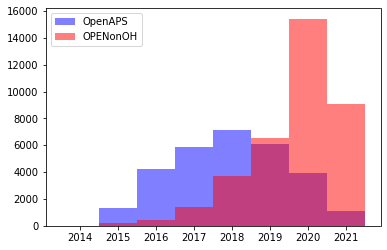

In [10]:
df10 = df_per_day["OpenAPS"]
df10["year"] = df10["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").year)

min_, max_ = min(df2["year"].min(),df10["year"].min()), max(df2["year"].max(),df10["year"].max())
print(min_, max_)
counts_OpenAPS, bins_OpenAPS = np.histogram(df10["year"], bins=[min_ - 0.5, max_ + 0.5])
counts_OPENonOH, bins_OPENonOH = np.histogram(df2["year"], bins=[min_ - 0.5, max_ + 0.5])
#min_, max_ = df10["year"].min(), df10["year"].max()
plt.hist(df10["year"], bins=np.arange(min_ -0.5, max_ + 0.5), color="blue", label="OpenAPS", alpha=0.5)
#min_, max_ = df2["year"].min(), df2["year"].max()
plt.hist(df2["year"], bins=np.arange(min_ -0.5, max_ + 0.5), color="red", label="OPENonOH", alpha=0.5)


plt.legend()
#plt.stairs(counts_OPENonOH, bins=bins_OPENonOH, color="red", label="OPENonOH")

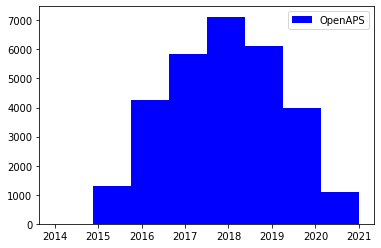

In [11]:
min_, max_ = df10["year"].min(), df10["year"].max()
plt.hist(df10["year"], bins=max_ - min_ + 1, color="blue", label="OpenAPS")
plt.legend()


In [12]:
def df_groupedby(df, gender = "Male", var = "DoW"):
    df_grby = df.loc[df["gender"] == gender, :].groupby(by=var).mean()
    df_grby[var] = df_grby.index
    if var == "DoW": 
        df_grby["DoW_str"] = df_grby["DoW"].apply(lambda x: "monday" if x == 0 else "tuesday" if x == 1 else "wednesday" if x == 2 else "thursday" if x == 3 else "friday" if x == 4 else "saturday" if x == 5 else "sunday")
    return df_grby


In [13]:

df3 = {}
for var in ["DoW", "day", "day"]:
    df3[var] = {}
    for gender in ["Female", "Male"]:
        df3[var][gender] = df_groupedby(df2, gender, var)
print(df3)

{'DoW': {'Female':                id    sgv_mean    sgv_std         year     month        day  \
DoW                                                                          
0    3.455589e+07  125.622601  35.922883  2019.657993  6.764560  15.631351   
1    3.430411e+07  125.852534  36.668636  2019.665835  6.773691  15.602868   
2    3.417928e+07  127.062324  37.135209  2019.668742  6.749066  15.525529   
3    3.431502e+07  126.090102  36.495051  2019.661080  6.774053  15.757294   
4    3.438203e+07  125.694095  37.074211  2019.660236  6.718108  15.784070   
5    3.443197e+07  125.460006  37.382918  2019.671651  6.714642  15.780685   
6    3.472173e+07  127.108742  37.409857  2019.664811  6.739641  15.627087   

     DoW    DoW_str  
DoW                  
0      0     monday  
1      1    tuesday  
2      2  wednesday  
3      3   thursday  
4      4     friday  
5      5   saturday  
6      6     sunday  , 'Male':                id    sgv_mean    sgv_std         year     month        

# Average statistics using timeseries breakdown on daily basis and classification based on gender

In [14]:
path = r'OpenAPS_AAPS_Uploader_per_day.csv'  # specify data path
demographics_path = r''  # specify data path

df_demographics = pd.read_csv(demographics_path, index_col=None)

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]

patient_unstrip_IDs = [i.split('_entries', 1)[0] for i in files]

patient_IDs = [ele.lstrip('0') for ele in patient_unstrip_IDs]

df_id_files = pd.DataFrame({'id': patient_IDs, 'EntriesFileName': files})

i = 0

Monday = []
Tuesday = []
Wednesday = []
Thursday = []
Friday = []
Saturday = []
Sunday = []
demographics = []

i = 0

for f in files:

    patient_demographic = df_demographics[(df_demographics['id'] == int(
        df_id_files.id[i]))]

    if not patient_demographic.empty:
        demographics.append(patient_demographic)

        p = os.path.join(path, f)

        print("Patient ID: ", int(df_id_files.id[i]))

        # reading and processing files
        df = pd.read_csv(p, index_col=None, na_values=" null")
        df.index = pd.to_datetime(df["Timestamp"], format='%Y-%m-%d %H:%M:%S')

        df = df[~df.index.duplicated(keep='first')]  #remove duplicate indexes
        df = df[df['glucose'] > 39]  # remove everything less than 39
        df = df[df['glucose'] < 1000]  # remove everything greater than 40
        df['glucose'].values[
            df['glucose'] >
            400] = 400  # anything greater than 400 replace with 400

        df['Dateonly'] = df["Date"].str.split("/", n=2,
                                              expand=True)[2].astype(int)

        ## statistics
        Monday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Monday']).describe().transpose())
        Tuesday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Tuesday']).describe().transpose())
        Wednesday.append(
            pd.DataFrame(df['glucose'].loc[
                df['DoW'] == 'Wednesday']).describe().transpose())
        Thursday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Thursday']).describe().transpose())
        Friday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Friday']).describe().transpose())
        Saturday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Saturday']).describe().transpose())
        Sunday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Sunday']).describe().transpose())

    i = i + 1

FileNotFoundError: [Errno 2] Datei oder Verzeichnis nicht gefunden: ''

In [16]:
monday = pd.concat(Monday)  # convert statistics to dataframe
monday.reset_index(drop=True, inplace=True)
tuesday = pd.concat(Tuesday)
tuesday.reset_index(drop=True, inplace=True)
wednesday = pd.concat(Wednesday)
wednesday.reset_index(drop=True, inplace=True)
thursday = pd.concat(Thursday)
thursday.reset_index(drop=True, inplace=True)
friday = pd.concat(Friday)
friday.reset_index(drop=True, inplace=True)
saturday = pd.concat(Saturday)
saturday.reset_index(drop=True, inplace=True)
sunday = pd.concat(Sunday)
sunday.reset_index(drop=True, inplace=True)

all_stats3 = pd.concat(demographics)
all_stats3.reset_index(drop=True, inplace=True)
all_stats3 = all_stats3.drop(all_stats3.tail(7).index)
all_stats3 = all_stats3.filter(
    ['id', 'height', 'weight', 'age', 'gender', 'country', 'DIYTech'], axis=1)

monday_statistics = pd.concat([all_stats3, monday], axis=1)
tuesday_statistics = pd.concat([all_stats3, tuesday], axis=1)
wednesday_statistics = pd.concat([all_stats3, wednesday], axis=1)
thursday_statistics = pd.concat([all_stats3, thursday], axis=1)
friday_statistics = pd.concat([all_stats3, friday], axis=1)
saturday_statistics = pd.concat([all_stats3, saturday], axis=1)
sunday_statistics = pd.concat([all_stats3, sunday], axis=1)

## Save daily output statistics for male and females

In [14]:
result = r'' # specify data path
    
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.2f}".format

monday_stats_m = monday_statistics[(monday_statistics['gender'] == 'Male')]
monday_stats_m.reset_index(drop=True)
monday_stats_m.to_csv(os.path.join(result, "monday_stats_m.csv"))

monday_stats_f = monday_statistics[(monday_statistics['gender'] == 'Female')]
monday_stats_f.reset_index(drop=True)
monday_stats_f.to_csv(os.path.join(result, "monday_stats_f.csv"))

# Plot daily average statistics

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

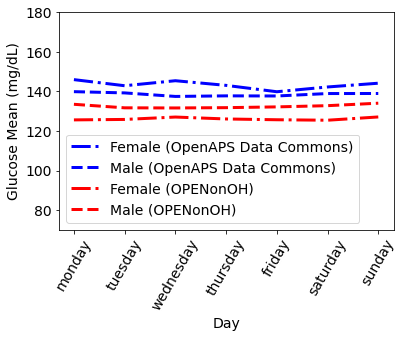

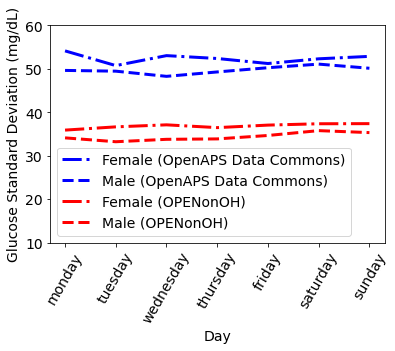

In [45]:
path = r'/home/reinhold/Daten/Paper_Datasets_Nov2022/results/daily/'  # specify data path

extension = 'csv'

OPENonOH_only = False

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
days = [i.split('_', 1)[0] for i in files]

i = 0
mean = []
std = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean.append(df['mean'].mean())
    std.append(df['std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'days': days,
    'mean': mean,
    'std': std,
    'data': files_unstrip_IDs,
})

all_stat = pd.concat([stats], axis=1)

all_stat.sort_values('data', inplace=True, ascending=False)
all_stat.reset_index(drop=True, inplace=True)

#print(all_stat)

statt = all_stat[['mean', 'data', 'days', 'std']].sort_values('data')

sorter = [
    'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
    'sunday'
]
sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['Day_id'] = statt.index
statt['Day_id'] = statt['days'].map(sorterIndex)

statt.sort_values('Day_id', inplace=True)

da_f = statt[statt['data'] == 'stats_f.csv']
da_m = statt[statt['data'] == 'stats_m.csv']

## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

plt.ylim(70, 180)
if not OPENonOH_only:
    ax = plt.plot(da_f['days'],
              da_f['mean'],
              color='blue',
              linestyle='-.',
              linewidth=3)
    ax = plt.plot(da_m['days'],
              da_m['mean'],
              color='blue',
              linestyle='--',
              linewidth=3)
ax = plt.plot(df3["DoW"]["Female"]['DoW_str'],
              df3["DoW"]["Female"]['sgv_mean'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df3["DoW"]["Male"]['DoW_str'],
              df3["DoW"]["Male"]['sgv_mean'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)

if OPENonOH_only:
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])
plt.xlabel('Day')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=60)
#plt.show()
#plt.savefig('DoW_mean.png')

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})
plt.ylim(10, 60)
if not OPENonOH_only:
    ax = plt.plot(da_f['days'],
              da_f['std'],
              color='blue',
              linestyle='-.',
              linewidth=3)
    ax = plt.plot(da_m['days'],
              da_m['std'],
              color='blue',
              linestyle='--',
              linewidth=3)
ax = plt.plot(df3["DoW"]["Female"]['DoW_str'],
              df3["DoW"]["Female"]['sgv_std'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df3["DoW"]["Male"]['DoW_str'],
              df3["DoW"]["Male"]['sgv_std'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)

if OPENonOH_only:
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])

plt.xlabel('Day')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=60)
#plt.show()
#plt.savefig('DoW_std.png')


# Plot hourly average statistics

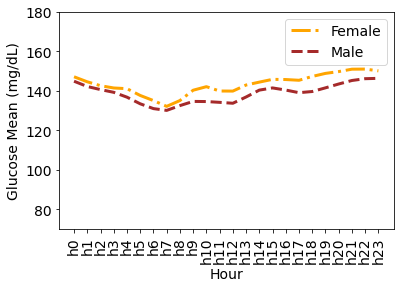

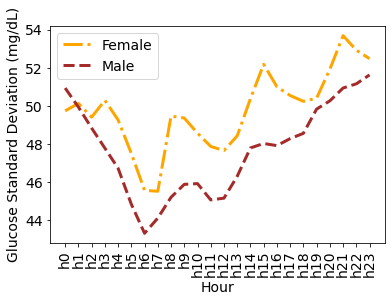

,hours,mean_m,std_m,mean_f,std_f,hour_id
0,h0,144.852227,50.932793,147.095983,49.733986,0
11,h1,142.171011,49.933113,144.552438,50.124410,1
16,h2,140.616969,48.828701,142.582262,49.404791,2
17,h3,139.231543,47.776770,141.429448,50.288675,3
18,h4,136.781015,46.717217,141.074636,49.256849,4
19,h5,133.424248,44.829261,137.647481,47.497692,5
20,h6,130.993650,43.303572,135.052980,45.556819,6
21,h7,130.090866,44.103694,132.127052,45.511040,7
22,h8,132.510147,45.196226,135.067054,49.458582,8
23,h9,134.627697,45.873938,140.293890,49.357249,9


In [15]:
path = r''  # specify data path

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
hours = [i.split('_', 1)[0] for i in files]

i = 0
mean_m = []
std_m = []

mean_f = []
std_f = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean_m.append(df.loc[df['gender'] == 'Male', 'mean'].mean())
    std_m.append(df.loc[df['gender'] == 'Male', 'std'].mean())

    mean_f.append(df.loc[df['gender'] == 'Female', 'mean'].mean())
    std_f.append(df.loc[df['gender'] == 'Female', 'std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'hours': hours,
    'mean_m': mean_m,
    'std_m': std_m,
    'mean_f': mean_f,
    'std_f': std_f
})

statt = pd.concat([stats], axis=1).sort_values('hours')

#all_stat.sort_values('data',inplace=True, ascending=False)
#all_stat.reset_index(drop=True, inplace=True)

#print(all_stat)

sorter = [
    'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11',
    'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21',
    'h22', 'h23'
]

sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['hour_id'] = statt.index
statt['hour_id'] = statt['hours'].map(sorterIndex)

statt.sort_values('hour_id', inplace=True)

## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})
plt.ylim(70, 180)
ax = plt.plot(statt['hours'],
              statt['mean_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['hours'],
              statt['mean_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Hour')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=90)
plt.show()

##

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

ax = plt.plot(statt['hours'],
              statt['std_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['hours'],
              statt['std_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Hour')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=90)
plt.show()
statt

# Average Statistics based on Monthly Breakdown 

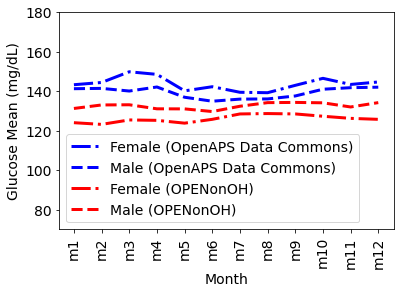

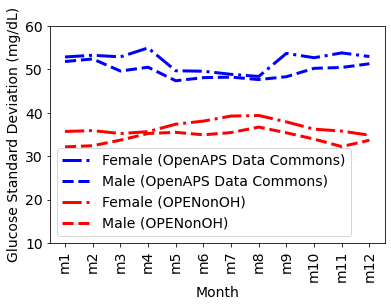

In [43]:
path = r'/home/reinhold/Daten/Paper_Datasets_Nov2022/results/monthly/'  # specify data path

OPENonOH_only = False

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
months = [i.split('_', 1)[0] for i in files]

i = 0
mean_m = []
std_m = []

mean_f = []
std_f = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean_m.append(df.loc[df['gender'] == 'Male', 'mean'].mean())
    std_m.append(df.loc[df['gender'] == 'Male', 'std'].mean())

    mean_f.append(df.loc[df['gender'] == 'Female', 'mean'].mean())
    std_f.append(df.loc[df['gender'] == 'Female', 'std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'months': months,
    'mean_m': mean_m,
    'std_m': std_m,
    'mean_f': mean_f,
    'std_f': std_f
})

statt = pd.concat([stats], axis=1).sort_values('months')

sorter = [
    'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'
]

sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['month_id'] = statt.index
statt['month_id'] = statt['months'].map(sorterIndex)

statt.sort_values('month_id', inplace=True)

#df3["day"]["Female"].reset_index(inplace=True)
#reset_index(inplace=True)
#df3["month"]["Male"].reset_index(inplace=True)

#print(df3["month"]["Female"]["month"])
df3["month"]["Female"]["month_str"] = df3["month"]["Female"]['month'].apply(lambda x: f"m{x}")
df3["month"]["Female"]["month_id"] = df3["month"]["Female"]['month_str'].map(sorterIndex)
df3["month"]["Female"].sort_values('month_id', inplace=True)

#df3["month"]["Male"].sort_values('month', inplace=True)
df3["month"]["Male"]["month_str"] = df3["month"]["Male"]['month'].apply(lambda x: f"m{x}")
df3["month"]["Male"]["month_id"] = df3["month"]["Male"]['month_str'].map(sorterIndex)
df3["month"]["Male"].sort_values('month_id', inplace=True)

## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

plt.ylim(70, 180)

if not OPENonOH_only:
    ax = plt.plot(statt['months'],
              statt['mean_f'],
              color='blue',
              linestyle='-.',
              linewidth=3)
    ax = plt.plot(statt['months'],
              statt['mean_m'],
              color='blue',
              linestyle='--',
              linewidth=3)
ax = plt.plot(df3["month"]["Female"]['month_str'],
              df3["month"]["Female"]['sgv_mean'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df3["month"]["Male"]['month_str'],
              df3["month"]["Male"]['sgv_mean'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)

if OPENonOH_only:
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])
plt.xlabel('Month')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=90)
plt.show()

##

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})
plt.ylim(10, 60)

if not OPENonOH_only:
    ax = plt.plot(statt['months'],
              statt['std_f'],
              color='blue',
              linestyle='-.',
              linewidth=3)
    ax = plt.plot(statt['months'],
              statt['std_m'],
              color='blue',
              linestyle='--',
              linewidth=3)
ax = plt.plot(df3["month"]["Female"]['month_str'],
              df3["month"]["Female"]['sgv_std'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df3["month"]["Male"]['month_str'],
              df3["month"]["Male"]['sgv_std'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)

if OPENonOH_only:
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])
plt.xlabel('Month')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=90)
plt.show()

# Average Statistics based on Date of Month Breakdown 

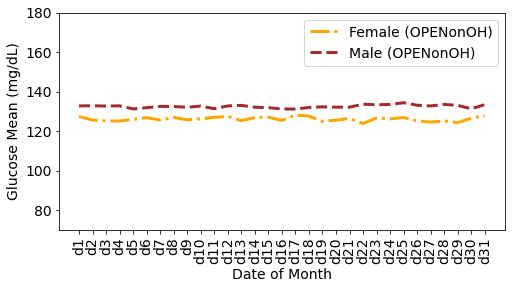

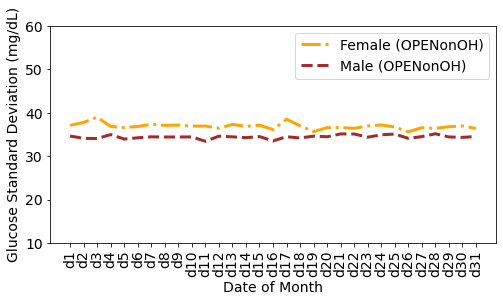

In [40]:
path = r'/home/reinhold/Daten/Paper_Datasets_Nov2022/results/dateofmonth/'  # specify data path

OPENonOH_only = True

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
date = [i.split('_', 1)[0] for i in files]

i = 0
mean_m = []
std_m = []

mean_f = []
std_f = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean_m.append(df.loc[df['gender'] == 'Male', 'mean'].mean())
    std_m.append(df.loc[df['gender'] == 'Male', 'std'].mean())

    mean_f.append(df.loc[df['gender'] == 'Female', 'mean'].mean())
    std_f.append(df.loc[df['gender'] == 'Female', 'std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'date': date,
    'mean_m': mean_m,
    'std_m': std_m,
    'mean_f': mean_f,
    'std_f': std_f
})

statt = pd.concat([stats], axis=1).sort_values('date')

#all_stat.sort_values('data',inplace=True, ascending=False)
#all_stat.reset_index(drop=True, inplace=True)

#print(all_stat)

sorter = [
    'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12',
    'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22',
    'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'
]

sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['date_id'] = statt.index
statt['date_id'] = statt['date'].map(sorterIndex)

statt.sort_values('date_id', inplace=True)

## Plotting data
df3["day"]["Female"]["day_str"] = df3["day"]["Female"]['day'].apply(lambda x: f"d{x}")
df3["day"]["Female"]["day_id"] = df3["day"]["Female"]['day_str'].map(sorterIndex)
df3["day"]["Female"].sort_values('day_id', inplace=True)

df3["day"]["Male"]["day_str"] = df3["day"]["Male"]['day'].apply(lambda x: f"d{x}")
df3["day"]["Male"]["day_id"] = df3["day"]["Male"]['day_str'].map(sorterIndex)
df3["day"]["Male"].sort_values('day_id', inplace=True)

# Designate a figure size and font size
plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 14})

plt.ylim(70, 180)
if not OPENonOH_only:
    ax = plt.plot(statt['date'],
              statt['mean_f'],
              color='blue',
              linestyle='-.',
              linewidth=3)
    ax = plt.plot(statt['date'],
              statt['mean_m'],
              color='blue',
              linestyle='--',
              linewidth=3)
ax = plt.plot(df3["day"]["Female"]['day_str'],
              df3["day"]["Female"]['sgv_mean'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df3["day"]["Male"]['day_str'],
              df3["day"]["Male"]['sgv_mean'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)
if OPENonOH_only:
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])
plt.xlabel('Date of Month')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=90)
plt.show()

##

plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 14})
plt.ylim(10, 60)
if not OPENonOH_only:
    ax = plt.plot(statt['date'],
              statt['std_f'],
              color='blue',
              linestyle='-.',
              linewidth=3)
    ax = plt.plot(statt['date'],
              statt['std_m'],
              color='blue',
              linestyle='--',
              linewidth=3)
ax = plt.plot(df3["day"]["Female"]['day_str'],
              df3["day"]["Female"]['sgv_std'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df3["day"]["Male"]['day_str'],
              df3["day"]["Male"]['sgv_std'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)
if OPENonOH_only:
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])
plt.xlabel('Date of Month')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=90)
plt.show()
